# <center><span style="color:Brown">Project2-Concrete Dataset</span></center>

## PS: To Determine Strength of Cement (Regression)

In [103]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing library to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#importing model building libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [104]:
data=pd.read_csv('https://raw.githubusercontent.com/patilanirudh/Yhills_July12_Analytics/main/concrete.csv')

In [105]:
data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [107]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [108]:
data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [109]:
data.sample(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
586   165.0    0.0  143.6  163.8           0.0     1005.6    900.9   56   
840   302.0    0.0    0.0  203.0           0.0      974.0    817.0   28   
185   350.0    0.0    0.0  203.0           0.0      974.0    775.0   14   
354   135.7  203.5    0.0  185.7           0.0     1076.2    759.3    7   
713   190.0  190.0    0.0  228.0           0.0      932.0    670.0  365   
59    250.0    0.0   95.7  187.4           5.5      956.9    861.2  100   
120   331.0    0.0    0.0  192.0           0.0      978.0    825.0    7   
312   236.0    0.0    0.0  193.0           0.0      968.0    885.0  180   
679   349.0    0.0    0.0  192.0           0.0     1047.0    806.9    3   
499   280.0  129.0  100.0  172.0           9.0      825.0    805.0   28   

     strength  
586     36.56  
840     21.75  
185     22.53  
354      7.51  
713     53.69  
59      42.35  
120     16.26  
312     24.10  
679     15.05  
499     52.82

In [110]:
data.shape

(1030, 9)

In [112]:
median1=data['slag'].median()
median1

22.0

In [113]:
median2=data['superplastic'].median()
median2

6.4

In [114]:
data

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[1030 rows x 9 columns]

In [115]:
# data['slag']=data['slag'].replace(to_replace=0.0,value=np.nan)
# data['slag']=data['slag'].astype(float)
# data['slag'].replace(np.nan,median1,inplace=True)

In [116]:
# data['superplastic']=data['superplastic'].replace(to_replace=0.0,value=np.nan)
# data['superplastic']=data['superplastic'].astype(float)
# data['superplastic'].replace(np.nan,median2,inplace=True)

In [117]:
# data['ash']=data['ash'].replace(to_replace=0.0,value=np.nan)
# data['ash']=data['ash'].astype(float)
# data['ash'].replace(np.nan,mean1,inplace=True)

In [118]:
data.sample(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
645   255.0    0.0    0.0  192.0           0.0      889.8    945.0   28   
768   250.2  166.8    0.0  203.5           0.0      977.6    694.1   28   
550   116.0  173.0    0.0  192.0           0.0      909.8    891.9    3   
247   213.7    0.0  174.7  154.8          10.2     1053.5    776.4   28   
226   167.4  129.9  128.6  175.5           7.8     1006.3    746.6   56   
637   149.0  117.6   91.7  182.9           7.1      953.4    780.3   28   
340   213.7    0.0  174.7  154.8          10.2     1053.5    776.4   14   
55    350.0    0.0    0.0  186.0           0.0     1050.0    770.0    7   
491   275.0  180.0  120.0  162.0          10.4      830.0    765.0   28   
601   339.0    0.0    0.0  197.0           0.0      968.0    781.0  365   

     strength  
645     18.75  
768     36.96  
550      6.28  
247     40.15  
226     51.72  
637     23.52  
340     33.73  
55      20.28  
491     76.24  
601     38.89

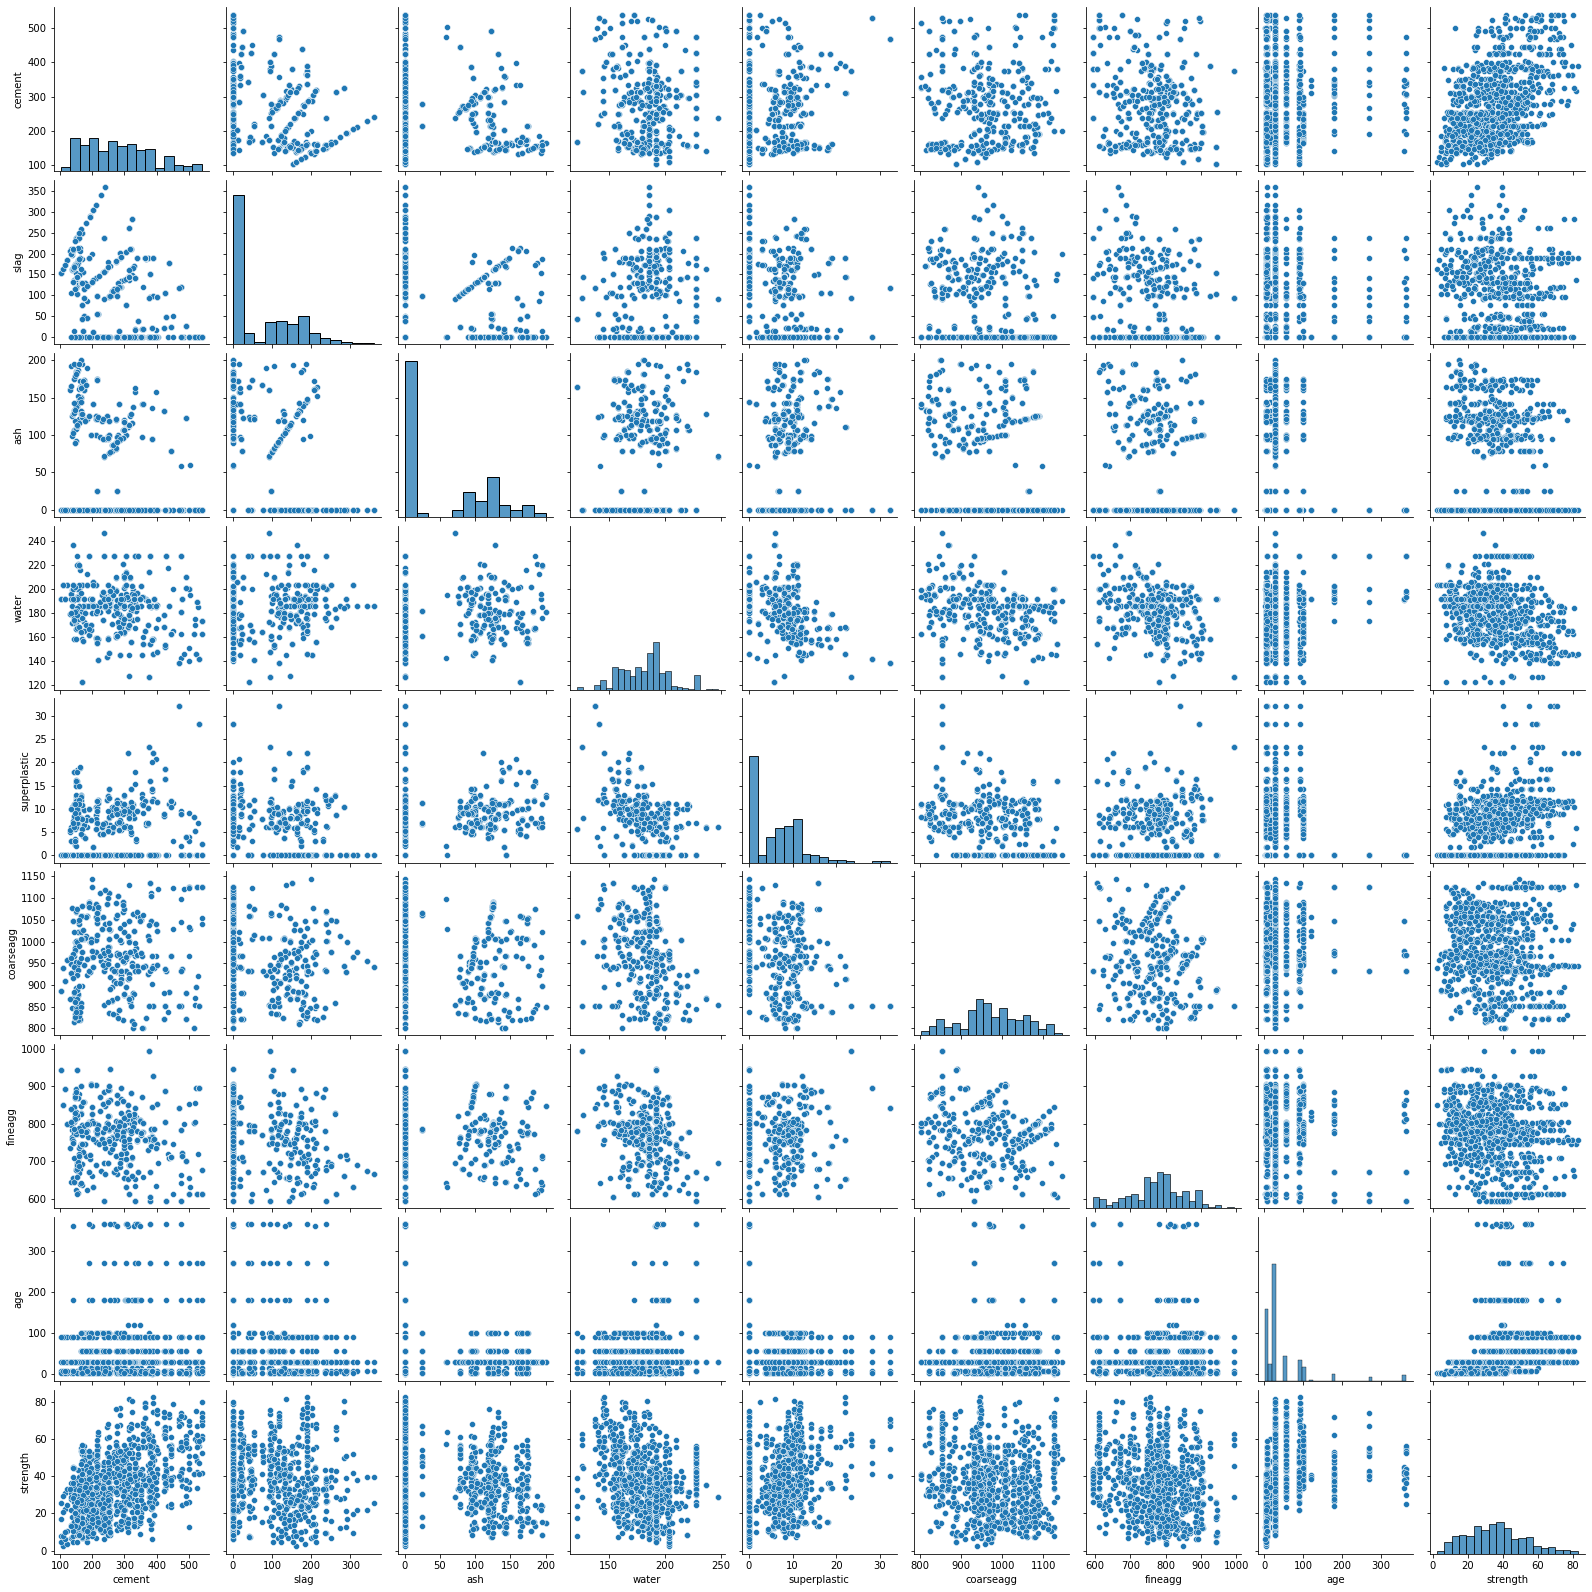

In [119]:
sns.pairplot(data)

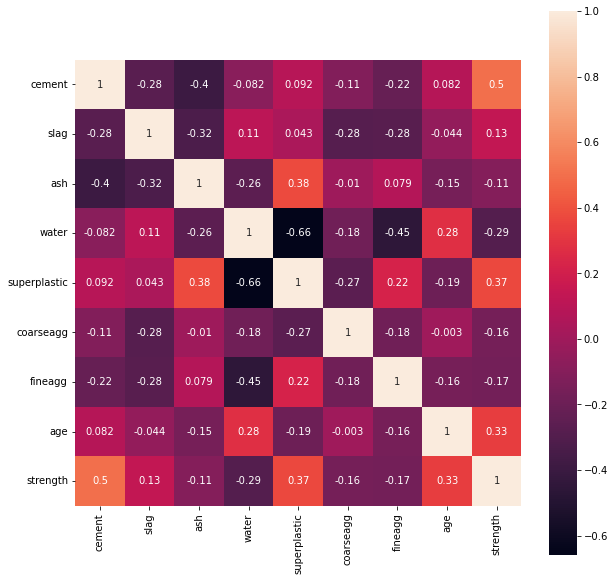

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),square=True,annot=True);

__Age,Superplastic,slag__ is __correlated__ with the __strength__ of the cement

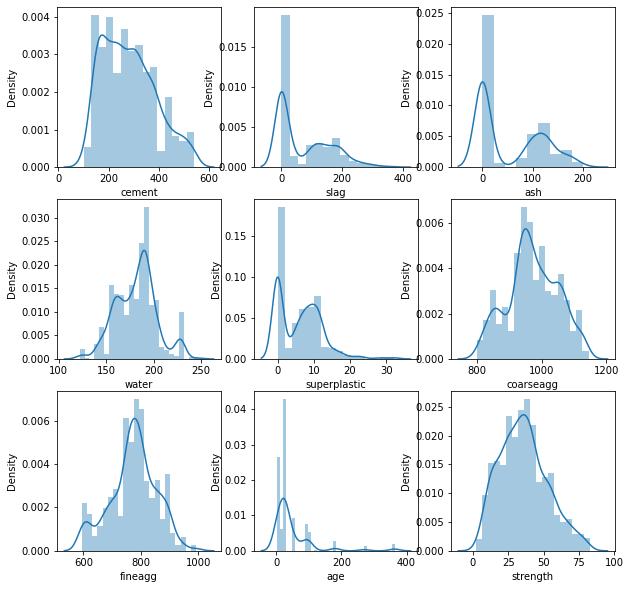

In [121]:
fig, ax2 = plt.subplots(3,3, figsize=(10,10))
sns.distplot(data['cement'], ax=ax2[0][0])
sns.distplot(data['slag'], ax=ax2[0][1])
sns.distplot(data['ash'], ax=ax2[0][2])
sns.distplot(data['water'], ax=ax2[1][0])
sns.distplot(data['superplastic'], ax=ax2[1][1])
sns.distplot(data['coarseagg'], ax=ax2[1][2])
sns.distplot(data['fineagg'], ax=ax2[2][0])
sns.distplot(data['age'], ax=ax2[2][1])
sns.distplot(data['strength'], ax=ax2[2][2]);

In [122]:
#linear model building
#independent variable and dependent variable
X=data.drop(['strength'],axis=1)
y=data[['strength']]

In [123]:
#split x and y data into 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=5)
#fit linear model
reg_model=LinearRegression(n_jobs=12)
reg_model.fit(X_train,y_train)
print(reg_model.score(X_train,y_train))
print(reg_model.score(X_test,y_test))


0.614358529953581
0.6142553848332775


In [124]:
print(reg_model.score(X_train,y_train))
print(reg_model.score(X_test,y_test))

0.614358529953581
0.6142553848332775


In [125]:
# def preprocess_input(df):
#     df = data.copy()
    
#     y = df['strength']
#     X = df.drop('strength', axis=1)
    
#     # Train-test split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
#     # Scale X with a standard scaler
#     scaler = StandardScaler()
#     scaler.fit(X_train)
    
#     X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
#     X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
#     return X_train, X_test, y_train, y_test

In [126]:
# X_train, X_test, y_train, y_test = preprocess_input(data)
# print(X_train.mean())
# print(X_train.var())

In [127]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                 L2 (Ridge) Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "             GradientBoostingRegressor": GradientBoostingRegressor(),
    "                              AdaBoost": AdaBoostRegressor()
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
                 L2 (Ridge) Regression trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                        Neural Network trained.
                         Random Forest trained.
             GradientBoostingRegressor trained.
                              AdaBoost trained.


In [128]:
for name, model in models.items():
    print(name + ": {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression: 0.61426
                 L2 (Ridge) Regression: 0.61426
Support Vector Machine (Linear Kernel): 0.32093
   Support Vector Machine (RBF Kernel): 0.23012
                         Decision Tree: 0.86423
                        Neural Network: 0.80553
                         Random Forest: 0.90822
             GradientBoostingRegressor: 0.89803
                              AdaBoost: 0.73894


In [129]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)

print("Model (Before Optimization) : {:.5f}".format(best_model.score(X_test,y_test)))

Model (Before Optimization) : 0.89879


In [130]:
params = {
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : [100, 150, 200],
    'max_depth' : [3, 4, 5]
}

clf = GridSearchCV(best_model, params)
clf.fit(X_train, y_train)

clf.best_params_
print("Model (After Optimization) : {:.5f}".format(clf.score(X_test,y_test)))

Model (After Optimization) : 0.93429


In [131]:
print("Model (After Optimization) : {:.5f}".format(clf.score(X_test,y_test)))

Model (After Optimization) : 0.93429


__Conclusion:__<br>
From above models we can conclude that the __best score__ for the model is __93__ for __Gradient Boost Regresssor__